# Задача 8
### Пешков Максим

In [1]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
import math

**Зададим функцию для построения графиков траекторий**

In [2]:
def find_solution(alpha, beta, gamma):
    m = GEKKO(remote = False)
    nt = 301
    m.time = np.linspace(0,100,nt)

    y = m.Var(value=0)
    x = m.Var(value=1) #начальные ограничения
    t = m.Var(value = 0)
    u = m.Var(value=0, lb = 0, ub = 1) #ограничение на управление

    p = np.zeros(nt)
    p[-1] = 1.0
    final = m.Param(value=p)


    m.Equation(x.dt()== (alpha * u - beta) * x) #запись уравнений
    m.Equation(t.dt() == 1)
    m.Equation(y.dt() == gamma * (1-u) * x)


    m.Maximize(y*final)
    m.options.IMODE = 6
    m.solve(disp=False)
    
    #для графиков
    plt.figure(figsize=(6, 10))
    plt.subplot(2,1,1)
    plt.plot(m.time[1:],y.value[1:],'k-',label=r'$y$')
    plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
    plt.plot([], [],' ', label = r'$\alpha = {}$'.format(alpha))
    plt.plot([], [],' ', label = r'$\beta = {}$'.format(beta))
    plt.plot([], [],' ', label = r'$\gamma = {}$'.format(gamma))
    plt.legend(loc='best')
    plt.ylabel('Value')
    plt.subplot(2,1,2)
    plt.plot(m.time[1:], x.value[1:], 'g-', label=r'$x$')
    plt.plot([], [],' ', label = r'$\alpha = {}$'.format(alpha))
    plt.plot([], [],' ', label = r'$\beta = {}$'.format(beta))
    plt.plot([], [],' ', label = r'$\gamma = {}$'.format(gamma))
    plt.legend(loc='best')
    plt.ylabel('Value')
    plt.xlabel('Time')
    plt.show()

Во-первых, все коеффициенты по условию должны быть на $[0;1]$. Во-вторых, тогда интересно посмотреть на крайние случаи (когда около 0 или около 1), а также когда коеффициенты имеют среднее значение. В-третьих, надо посмотреть как они соотносятся между собой даже в крайних случаях, так как это может менять траектории. Итого, интересные и, наверно, все возможные случаи траекторий, когда коеффициенты равны $[0.1, 0.2, 0.5, 0.8, 0.9]$. Поэтому ниже представлен тройной цикл, проходящий по этим значениям, из которых будут выбраны отдельные, чтобы было удобнее посмотреть.

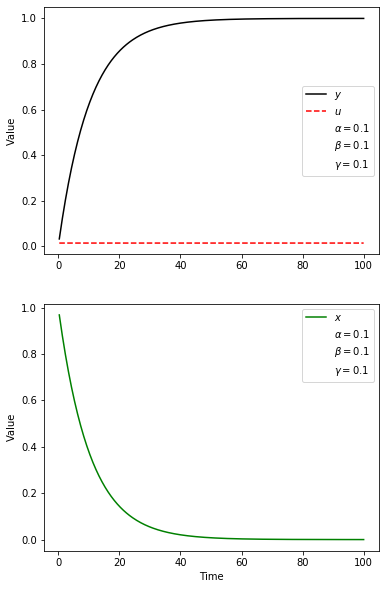

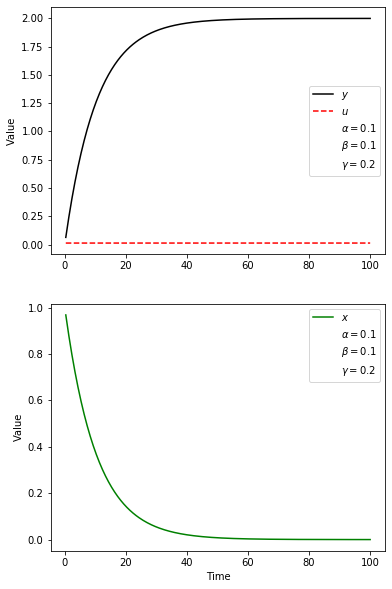

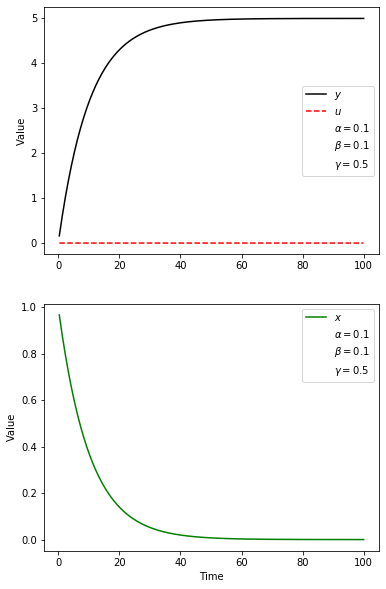

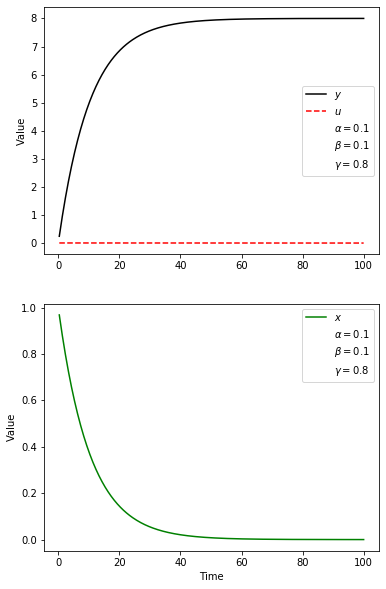

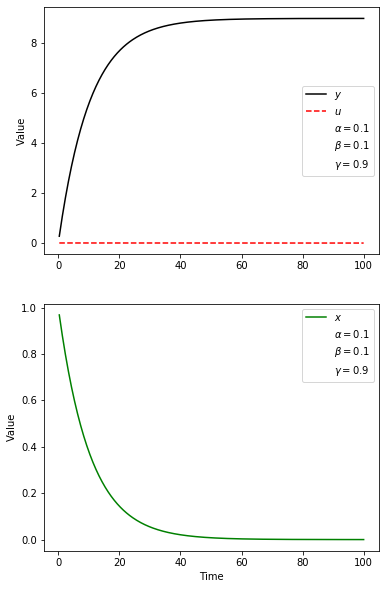

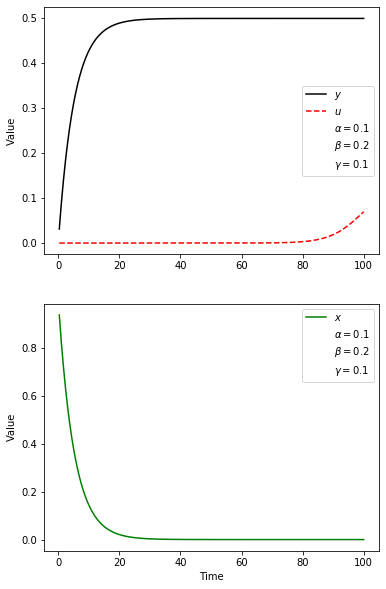

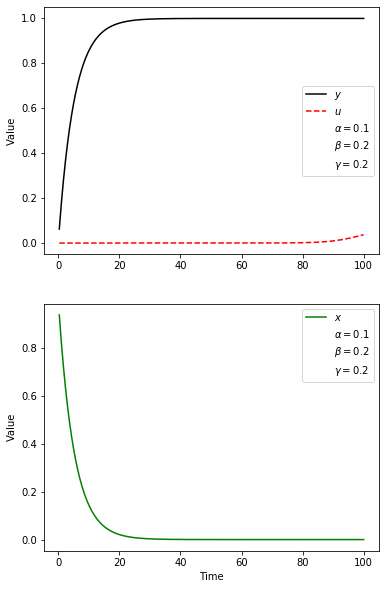

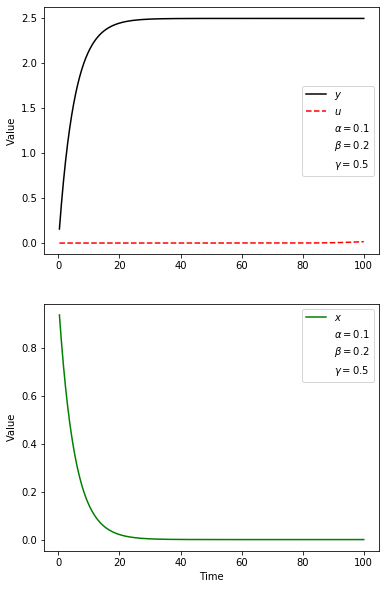

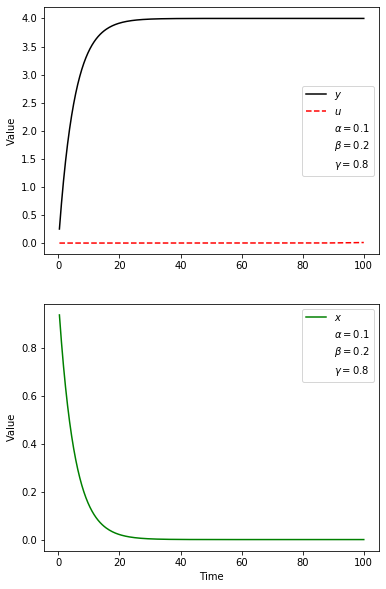

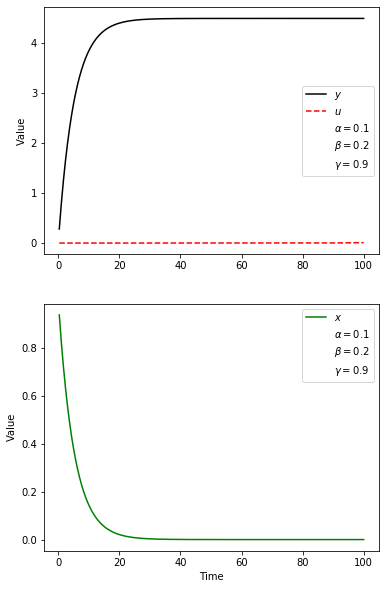

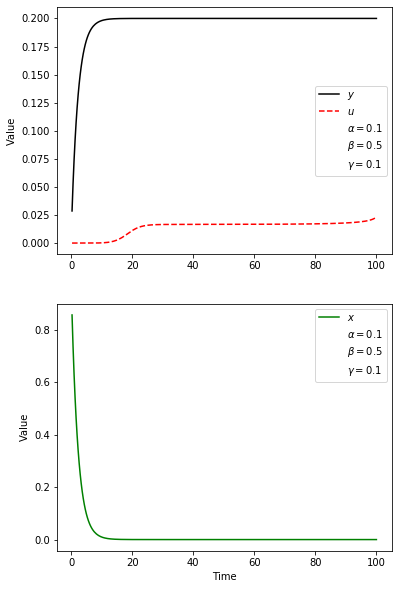

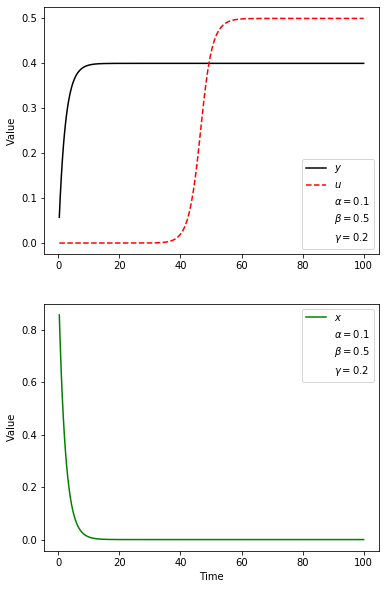

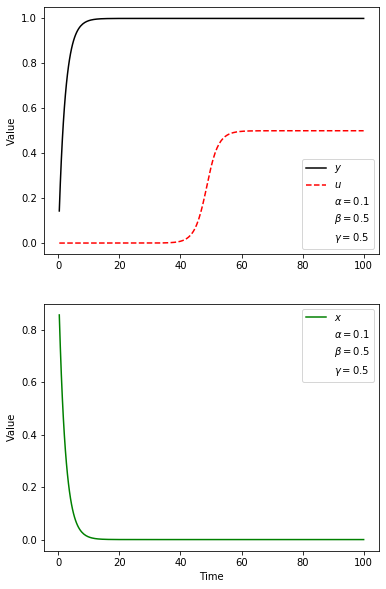

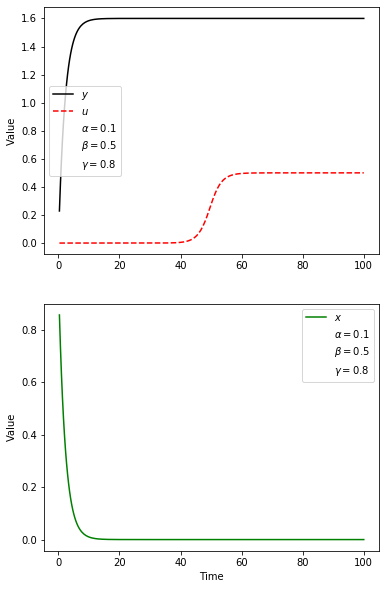

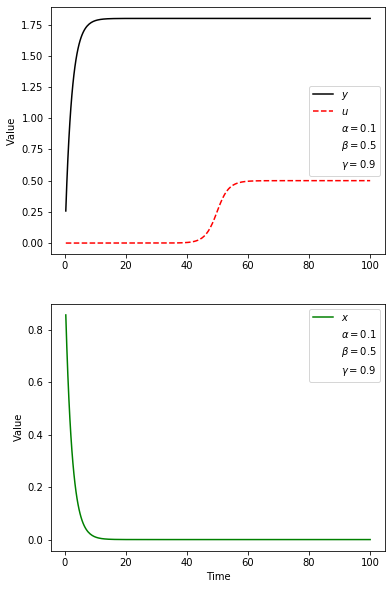

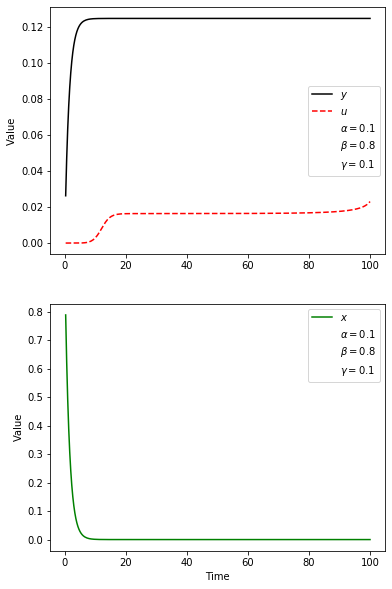

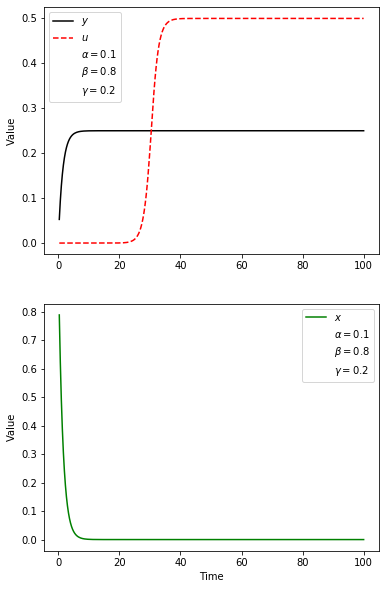

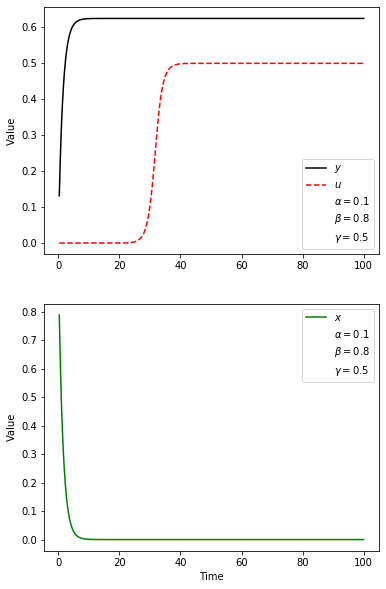

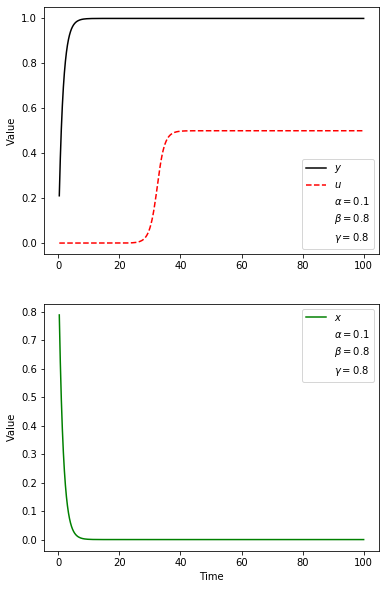

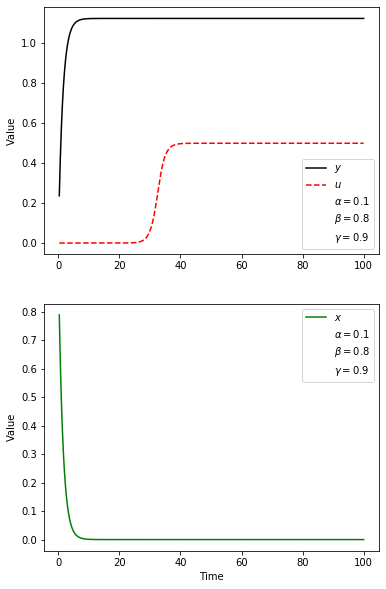

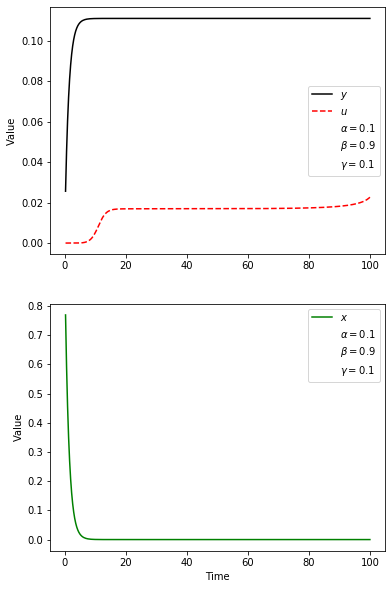

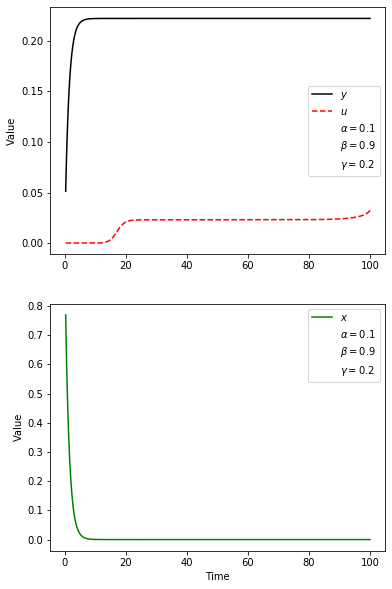

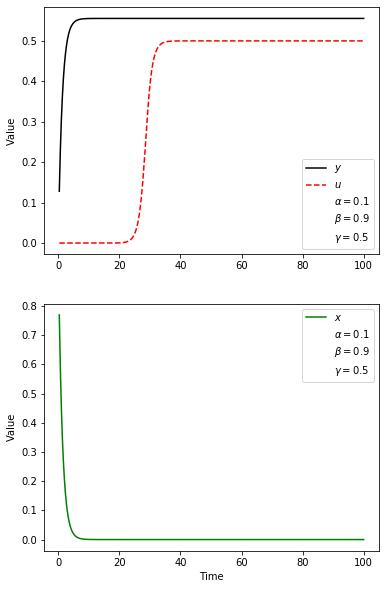

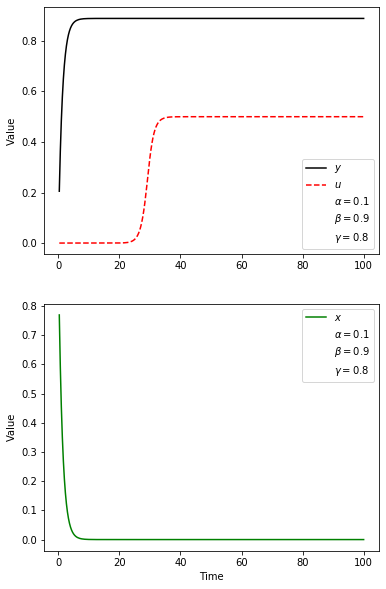

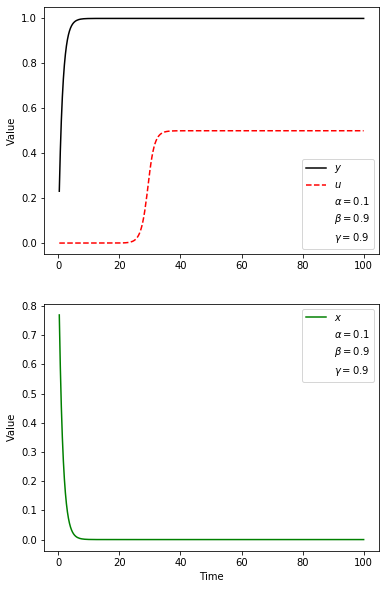

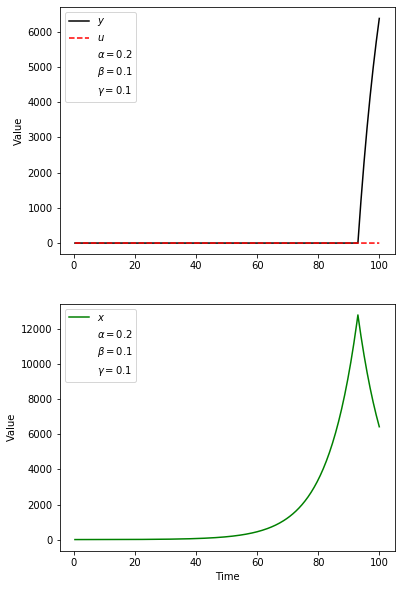

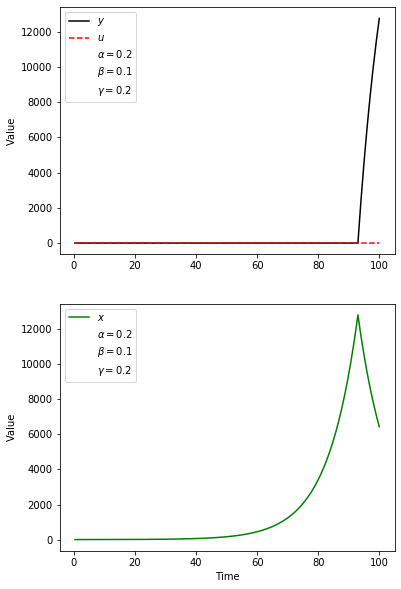

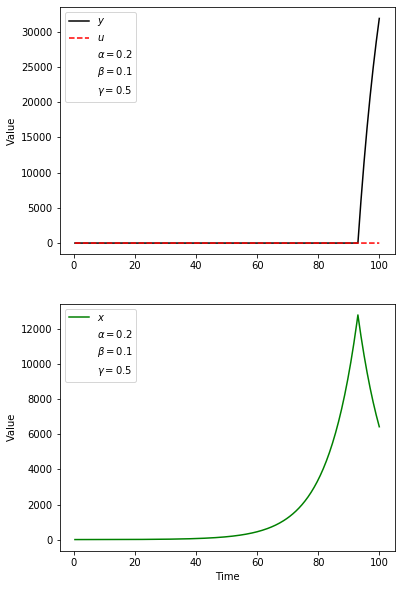

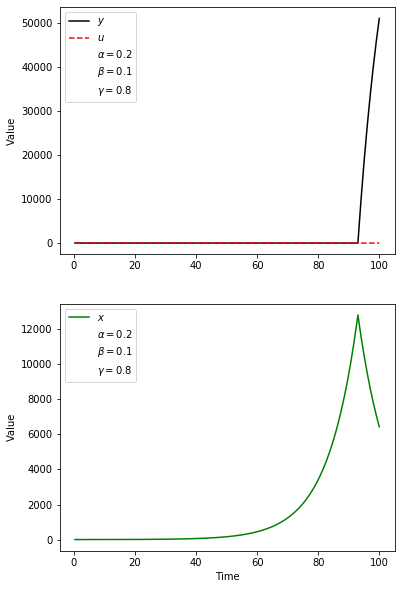

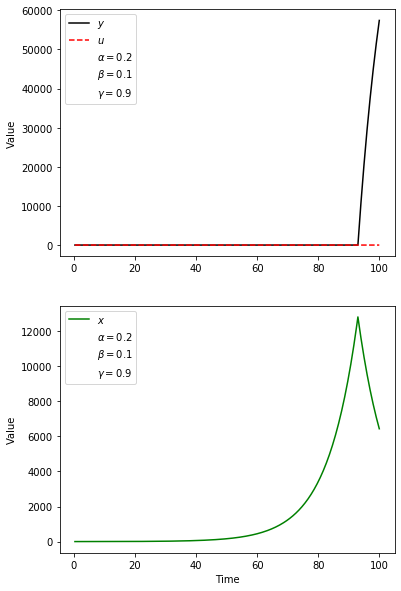

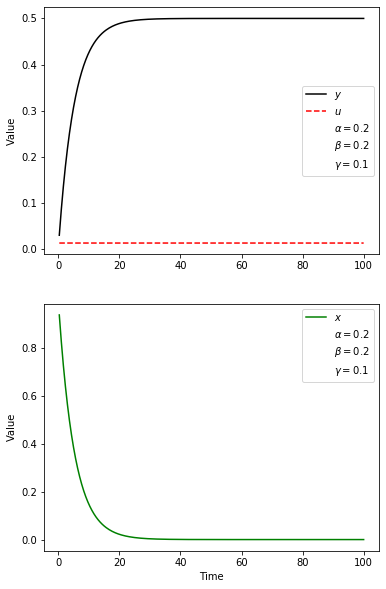

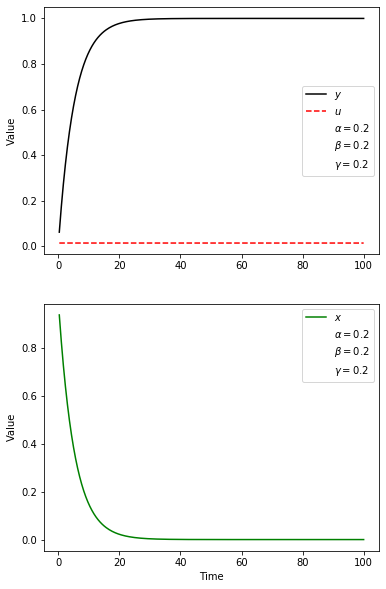

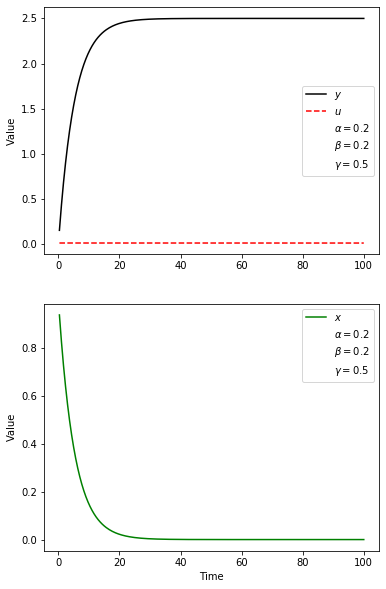

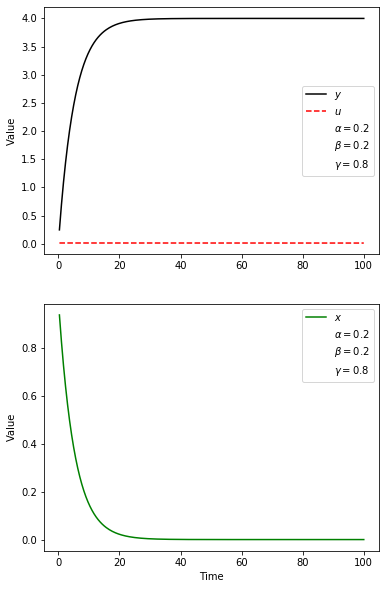

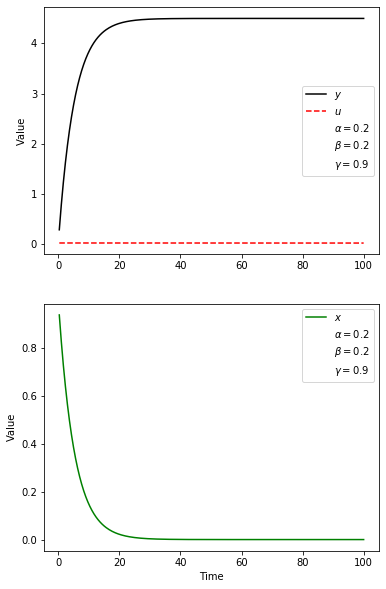

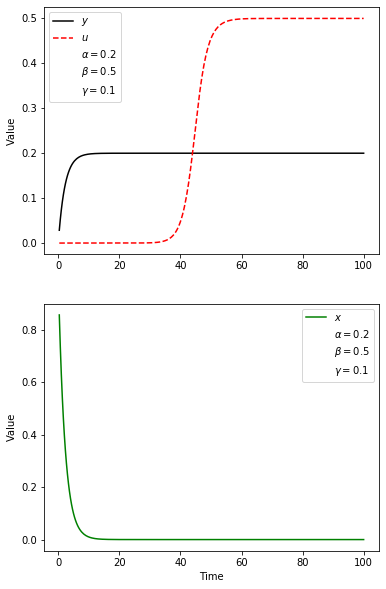

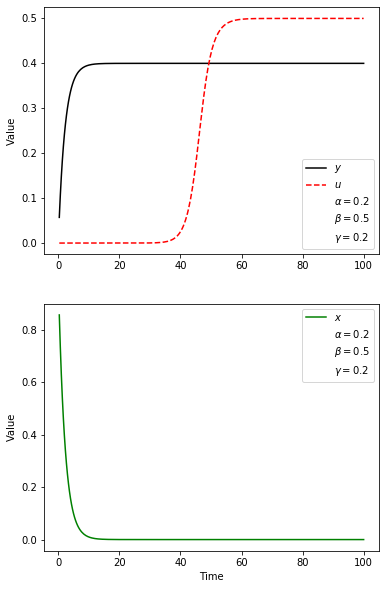

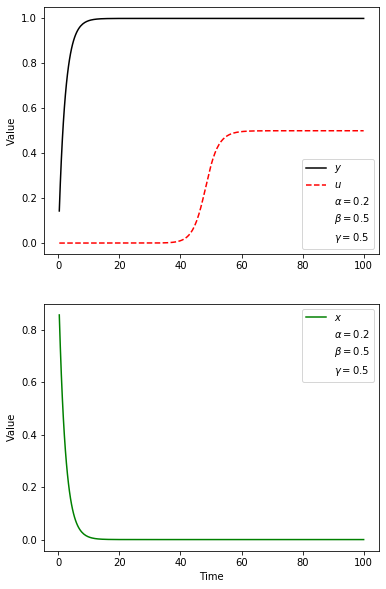

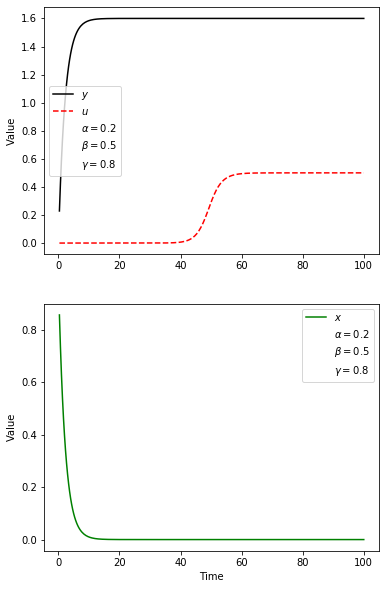

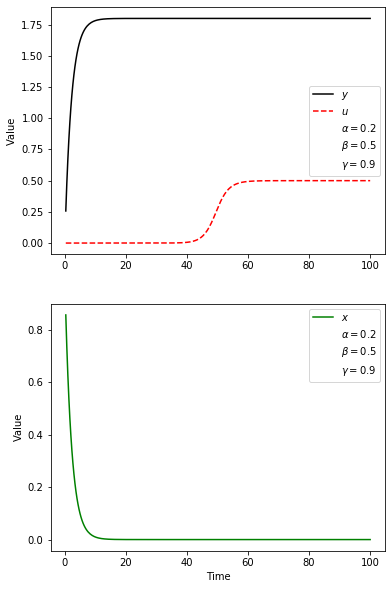

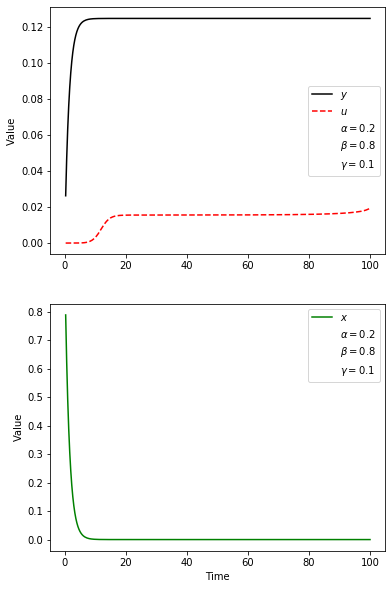

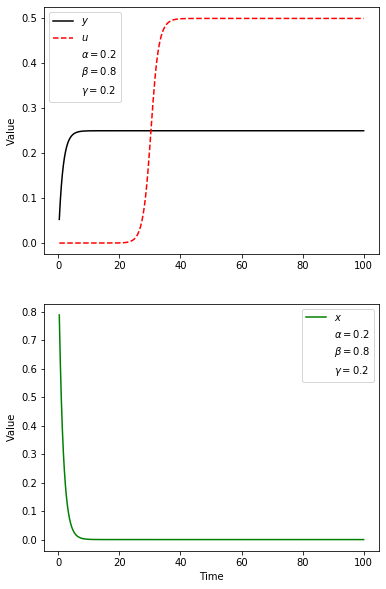

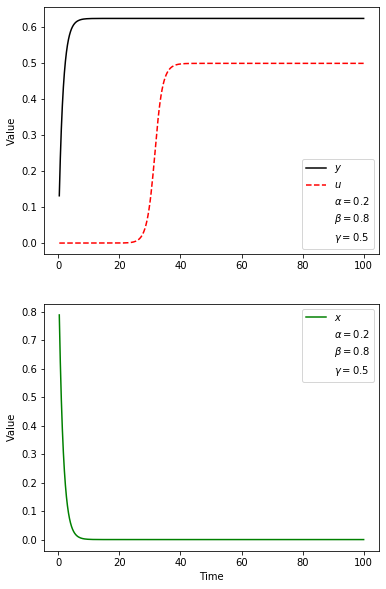

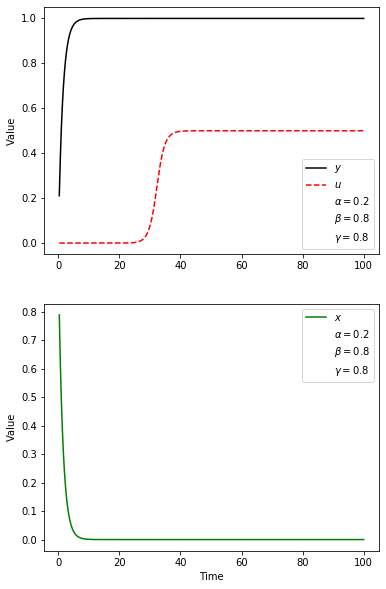

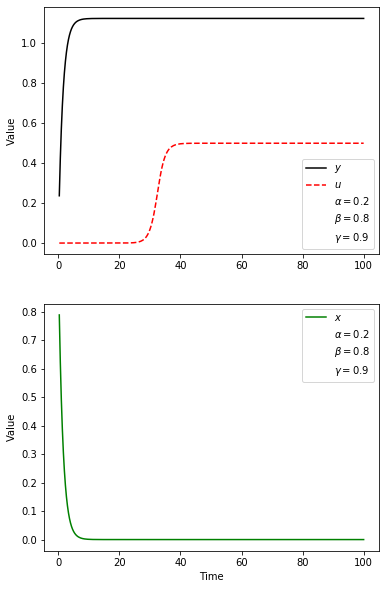

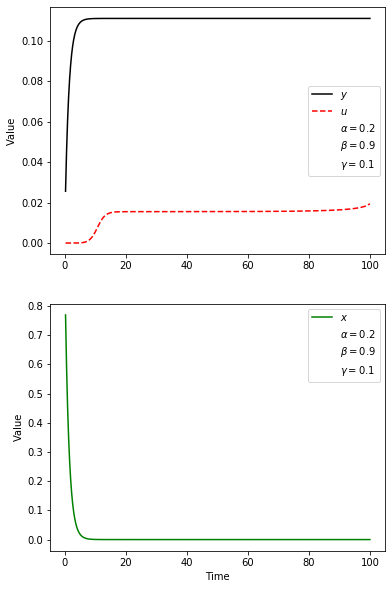

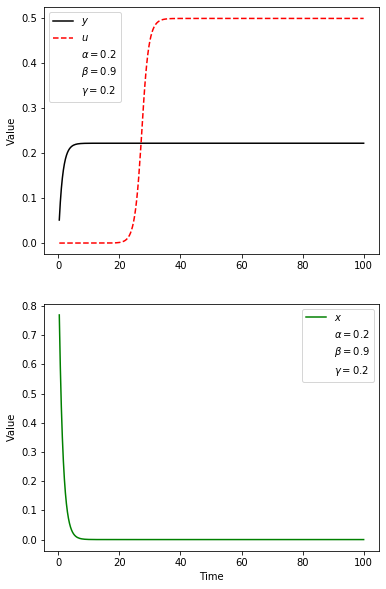

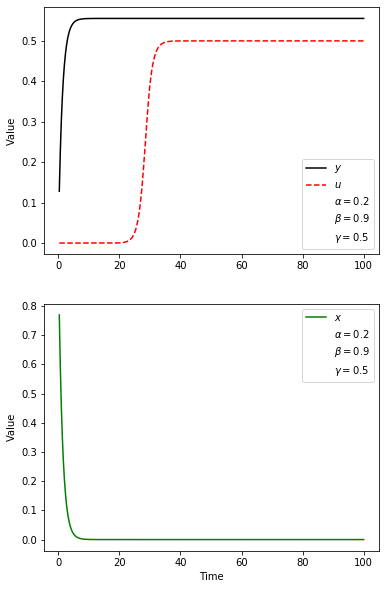

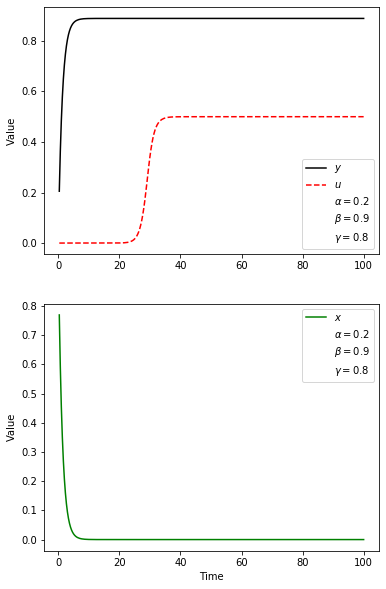

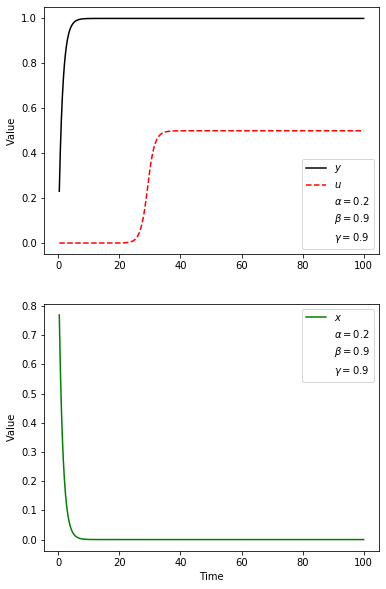

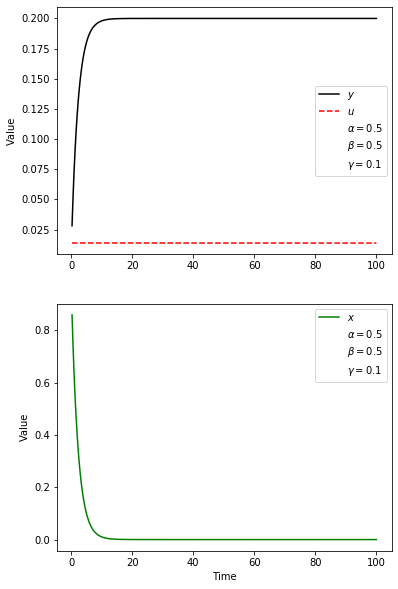

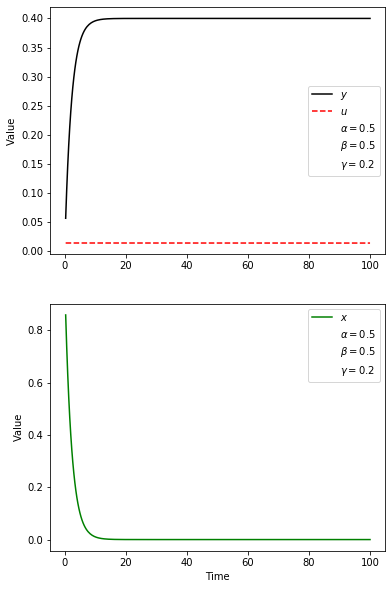

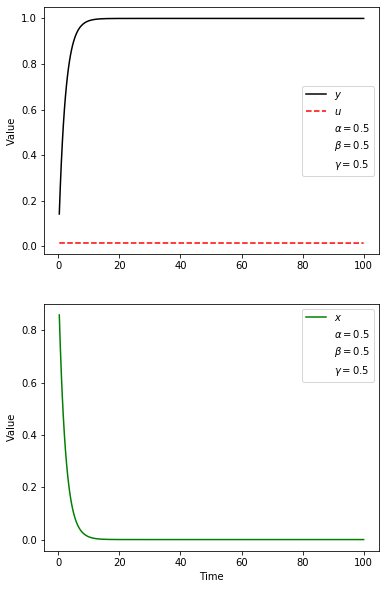

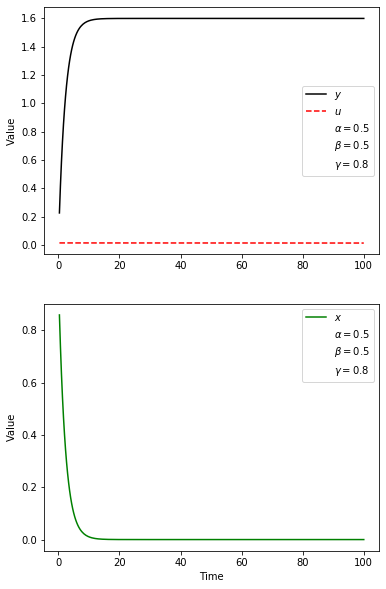

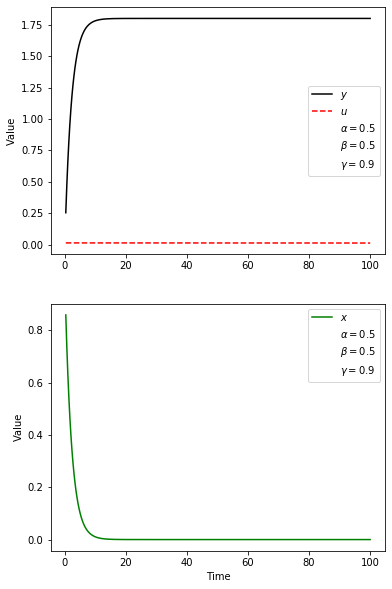

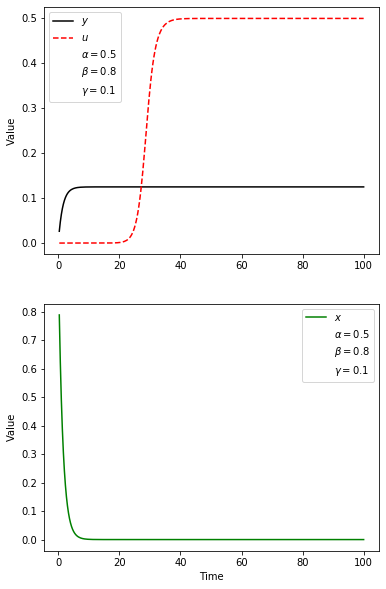

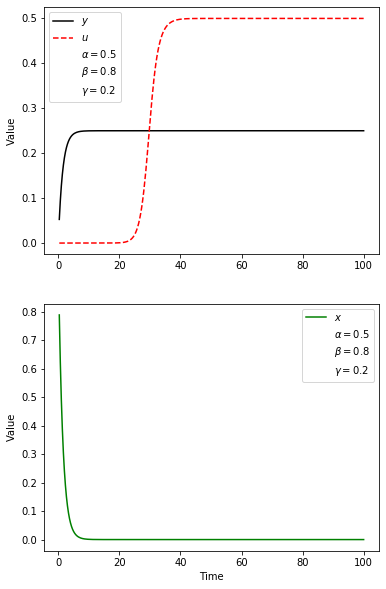

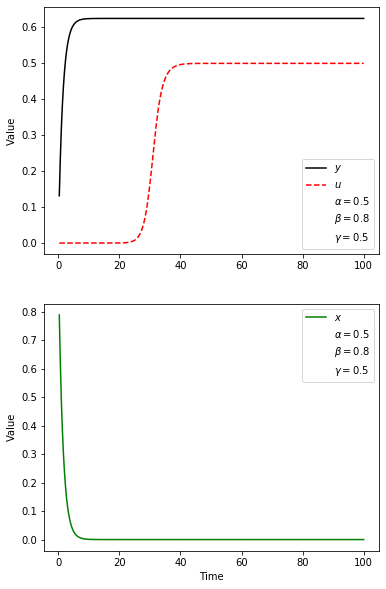

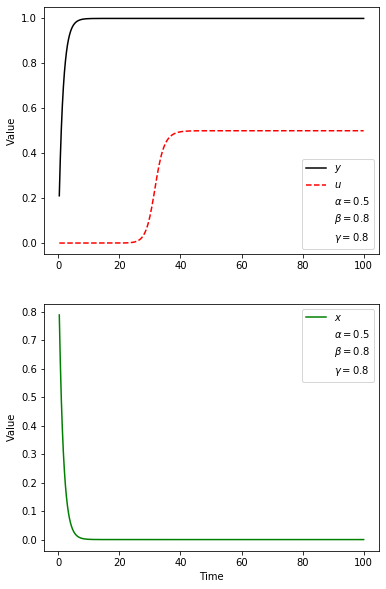

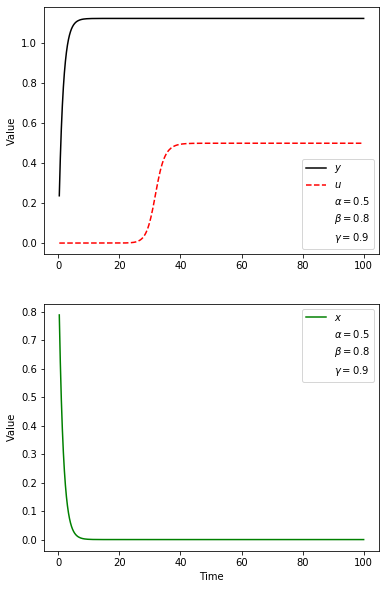

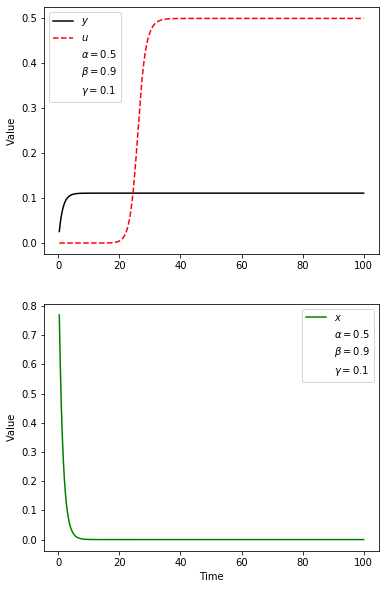

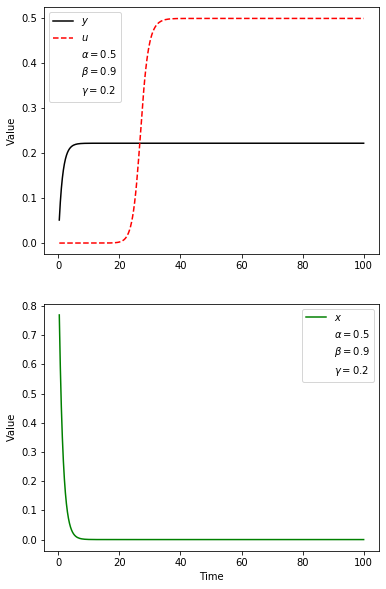

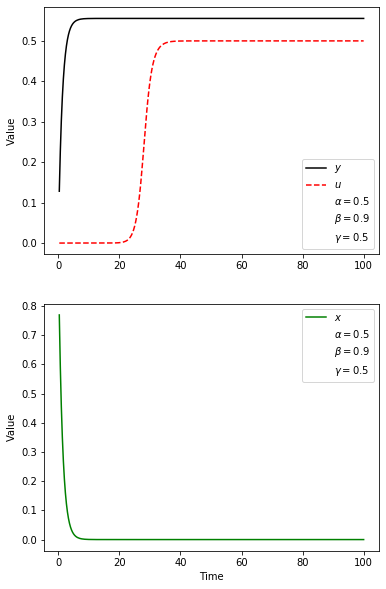

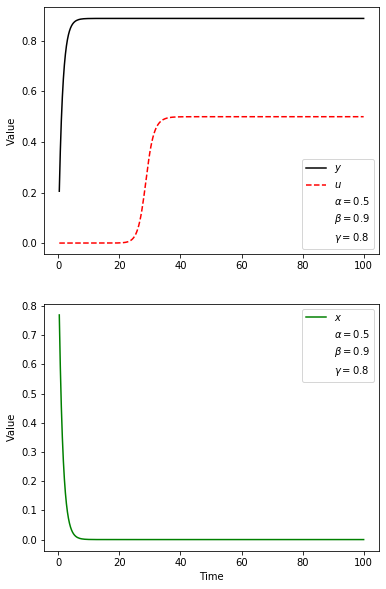

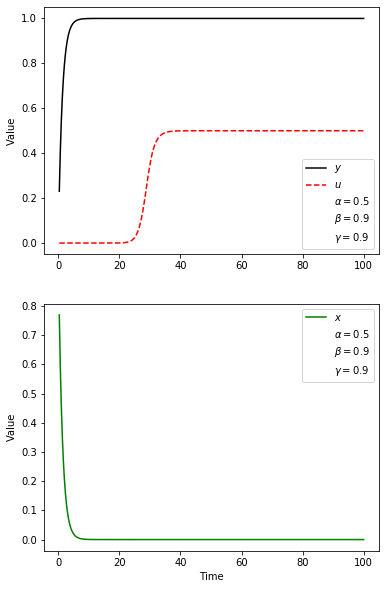

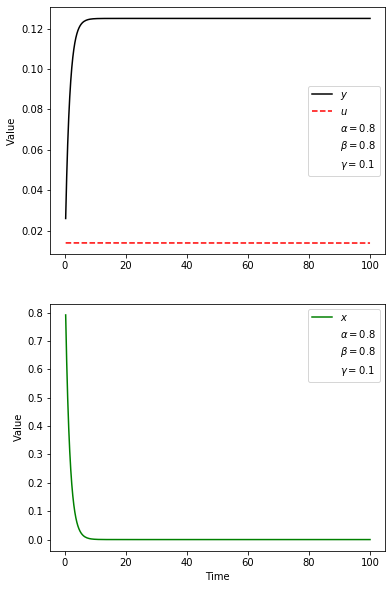

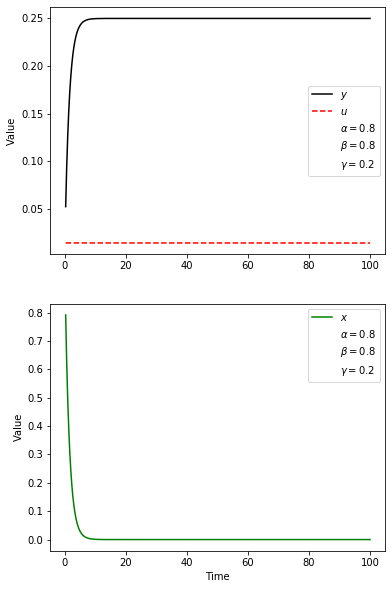

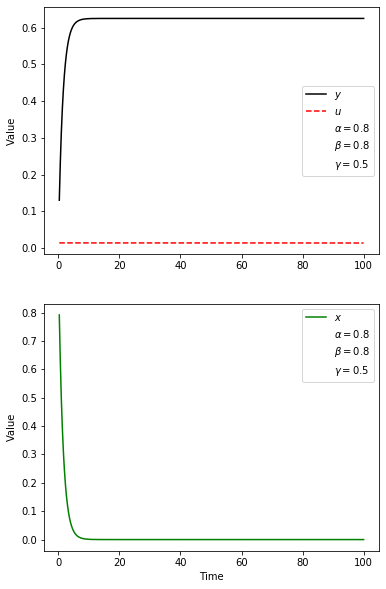

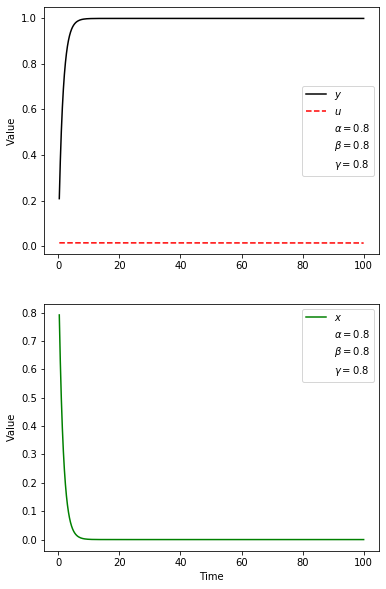

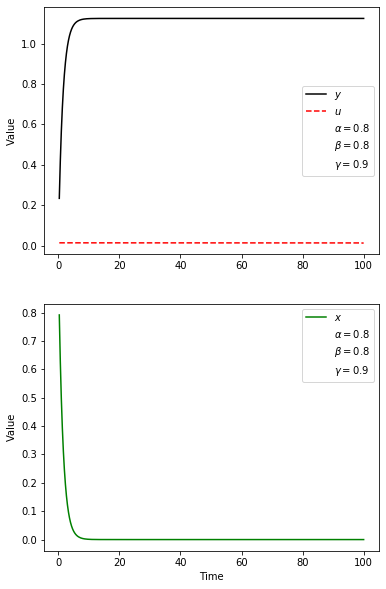

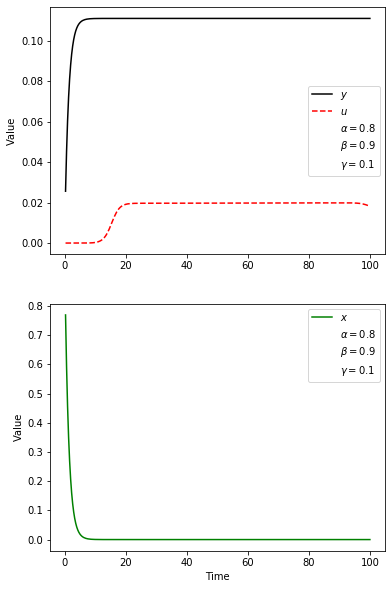

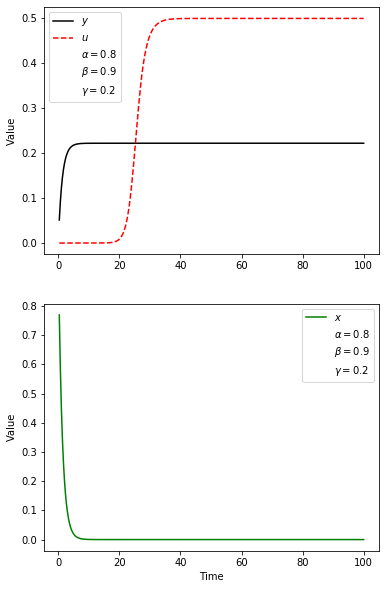

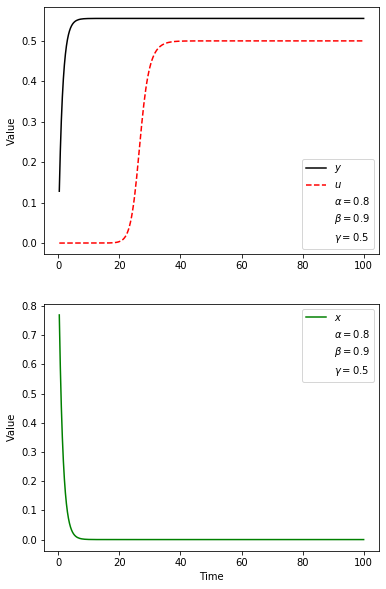

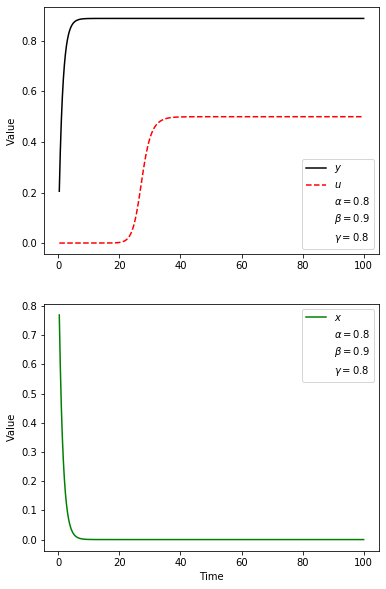

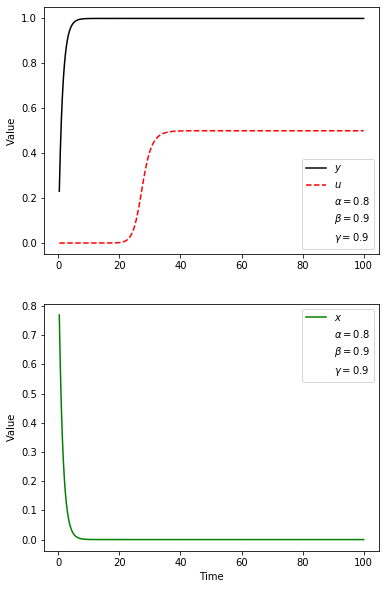

In [ ]:
values = [0.1, 0.2, 0.5, 0.8, 0.9]
for value in values:
    alpha = value
    for val in values:
        beta = val
        for v in values:
            gamma = v
            try:
                find_solution(alpha, beta, gamma)
            except:
                continue

# Рассмотрим основные случаи траекторий

1) $\alpha\approx\ \beta\approx0,\ \forall\gamma$

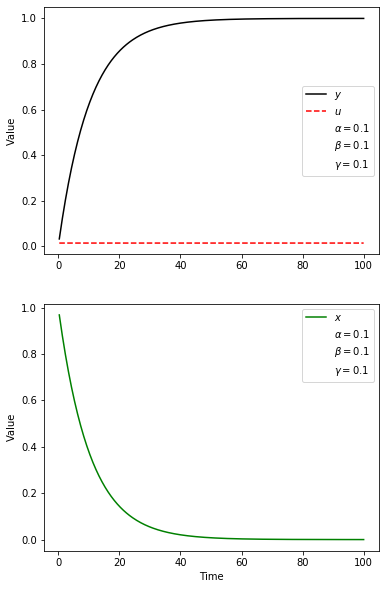

In [3]:
find_solution(0.1,0.1,0.1)

2) $\beta>\ \alpha,\ \forall\gamma$

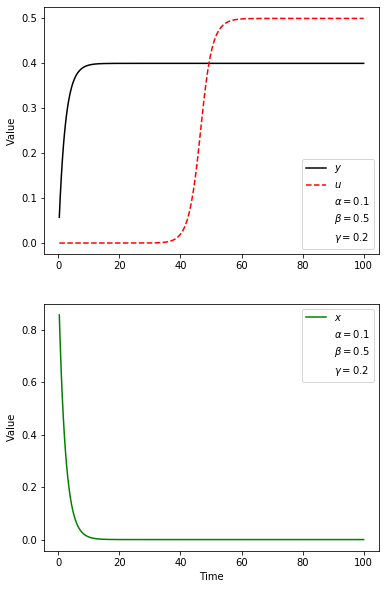

In [4]:
find_solution(0.1,0.5,0.2)

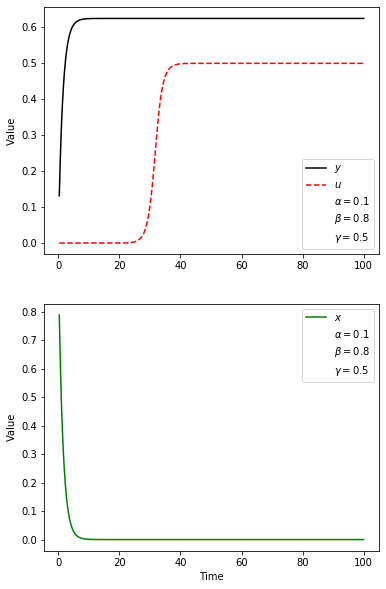

In [5]:
find_solution(0.1,0.8,0.5)

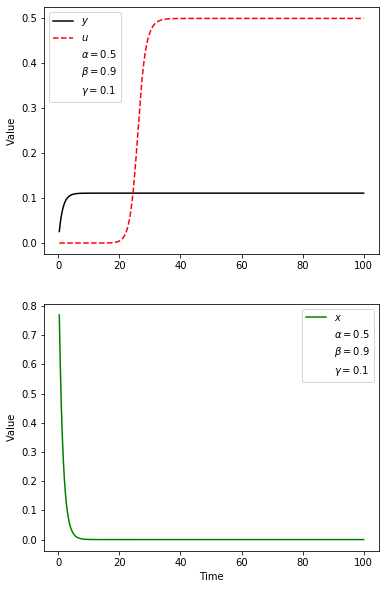

In [7]:
find_solution(0.5, 0.9, 0.1)

3) $	\alpha>\ \beta,\ \alpha,\ \beta\approx0,\ \ \forall\gamma$

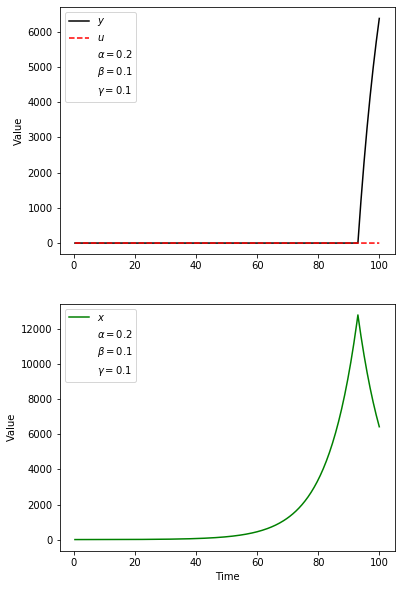

In [6]:
find_solution(0.2, 0.1, 0.1)